<a href="https://colab.research.google.com/github/ahmaddaniunnes/tugas/blob/main/PSD_Jobsheet_3_Ahmad_Dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

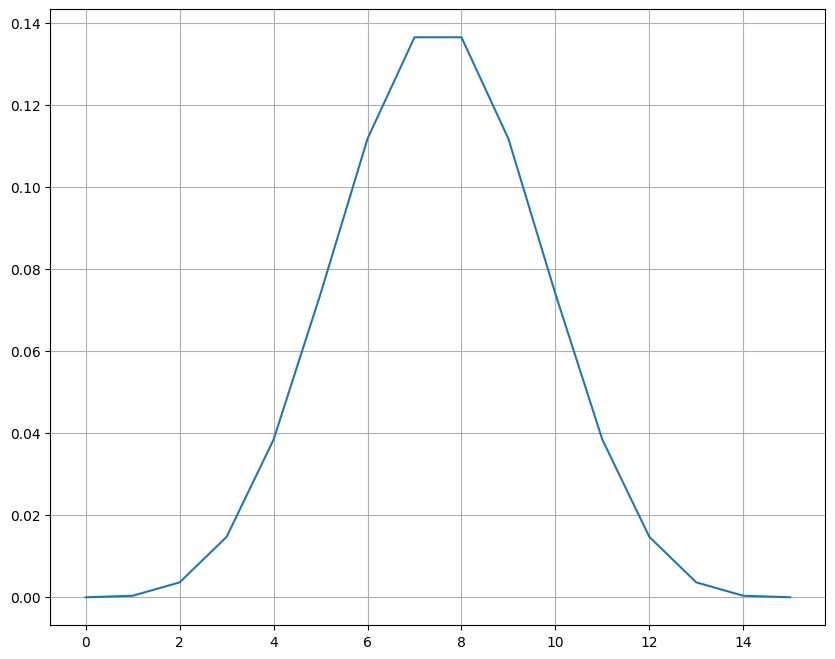

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(16);
h=np.sin(0.14*np.pi*(n-7.5))/(np.pi*(n-7.5));
hk=np.kaiser(16,8);
hfilt=hk*h

plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Diatas ditampilkan sebuah filter ideal dengan panjang (length = L) 16 (n = 0, ..., 15).
Dengan rumus ideal filter (dengan L = 16) adalah:

$h(n) = \text{ }\frac{\text{sin($ω_c$(n - 7.5))}}{{\text{$ω_c$(n - 7.5)}}}$

atau jika kita menggunakan normalisasi yang berbeda agar passband dimulai dari 0 dB:

$h(n) = \text{ }\frac{\text{sin($ω_c$(n - 7.5))}}{{\text{$π$(n - 7.5)}}}$

dengan $ω_c$ = 0.14π kemudian filter ini dikalikan dengan Jendela Kaiser (pada line hk=np.kaiser(16,8);)


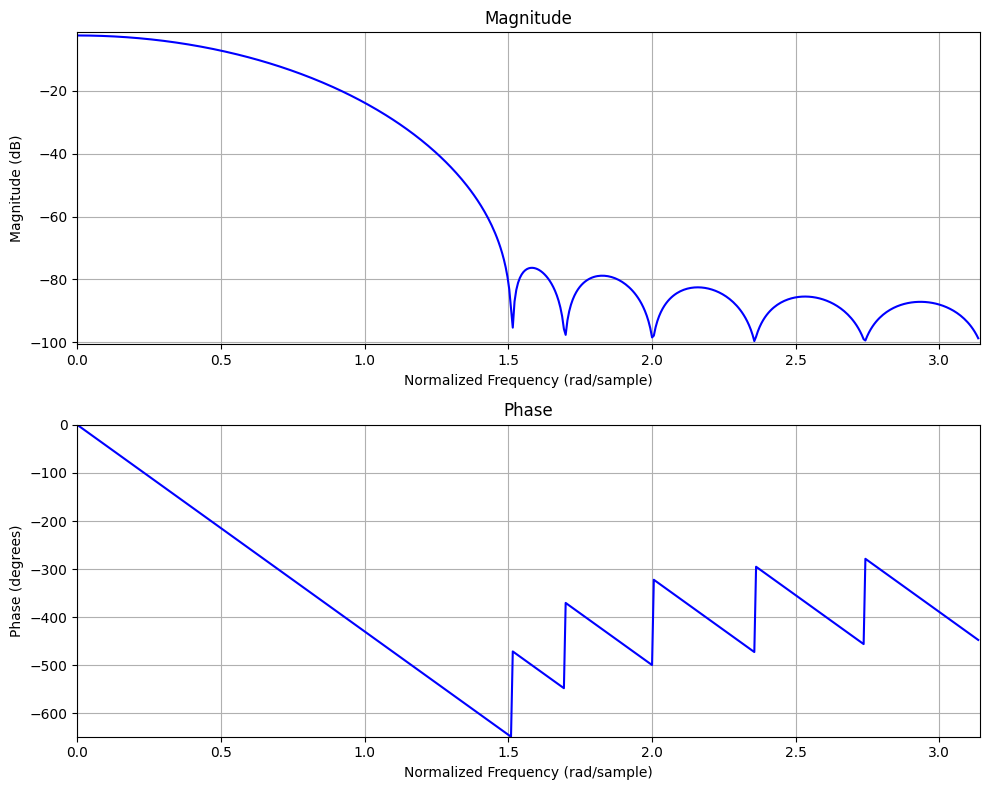

In [8]:
import scipy.signal as signal

def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,np.pi,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,np.pi,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

freqz(hfilt)

Kemudian setelah mendapatkan respons frekuensi (menggunakan program pada jobsheet sebelumnya), terlihat bahwa atenuasi yang didapat sudah cukup (sekitar -80 dB) namun passband yang didapat kurang mencukupi